In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get weather data 


## Darksky data

https://darksky.net/

https://github.com/lukaskubis/darkskylib

    pip install darkskylib


In [2]:
# Load the API key for darksky
with open('darksky_key.txt') as f:
    key = f.read()

In [3]:
from darksky import forecast

In [4]:
coords_grenoble = ( 45.166672, 5.71667 ) 

data = forecast(key, *coords_grenoble, units='si', lang='fr' )

In [5]:
type( data )

darksky.forecast.Forecast

In [6]:
data['currently']['temperature']

30.44

In [7]:
len( data['daily']['data'] )

8

In [8]:
T = [ hour.temperature for hour in data.hourly ]

print( len(T) )

49


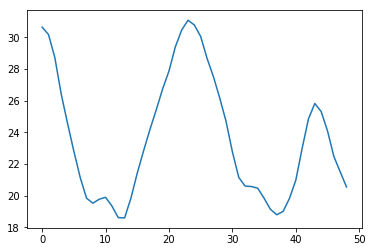

In [9]:
plt.plot( T )

In [10]:
from datetime import datetime as dt

In [11]:
t = dt(2017, 6, 23).isoformat()  # year month day hour ...

In [12]:
data = forecast(key, *coords_grenoble, units='si', lang='fr', time=t)

In [13]:
T = [ hour.temperature for hour in data.hourly ]

print( len(T) )

24


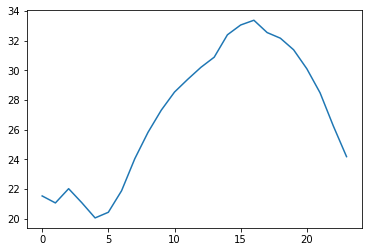

In [14]:
plt.plot( T );

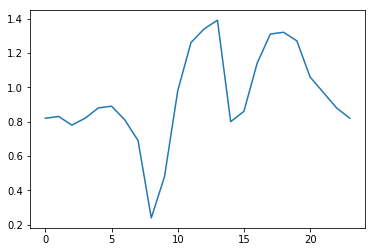

In [15]:
windSpeed = [ hour.windSpeed for hour in data.hourly ]

plt.plot( windSpeed );

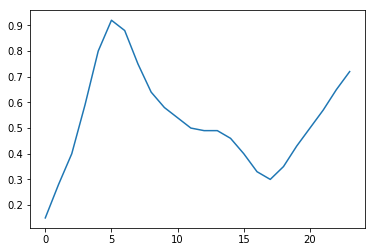

In [16]:
cloudCover = [ hour.cloudCover for hour in data.hourly ]

plt.plot( cloudCover );

In [26]:
data.hourly[4].temperature

20.06

In [27]:
timeindex = pd.to_datetime('today')[ hour.time for hour in data.hourly ]

[1498168800,
 1498172400,
 1498176000,
 1498179600,
 1498183200,
 1498186800,
 1498190400,
 1498194000,
 1498197600,
 1498201200,
 1498204800,
 1498208400,
 1498212000,
 1498215600,
 1498219200,
 1498222800,
 1498226400,
 1498230000,
 1498233600,
 1498237200,
 1498240800,
 1498244400,
 1498248000,
 1498251600]

In [30]:
[ hour['temperature'] for hour in data.hourly ]

[21.54,
 21.07,
 22.03,
 21.08,
 20.06,
 20.44,
 21.89,
 24.05,
 25.83,
 27.32,
 28.54,
 29.4,
 30.21,
 30.89,
 32.4,
 33.06,
 33.38,
 32.55,
 32.17,
 31.39,
 30.11,
 28.49,
 26.26,
 24.19]

In [54]:
import pandas as pd

In [61]:
# voir https://darksky.net/dev/docs/response
datalabels = ['temperature', 'cloudCover', 'precipIntensity', 'windSpeed' , 'windBearing']

In [66]:
def buildDFdaily(day, coords):
    data = forecast(key, *coords, units='si', lang='fr', time=day)
    
    timeindex = pd.to_datetime( [ hour.time for hour in data.hourly ],  unit='s' , origin='unix' )
    
    dailydata = {}
    for label in datalabels:
        dailydata[label] = [ dataeveryhour[label] for dataeveryhour in data.hourly ]
        
    df = pd.DataFrame(dailydata, index=timeindex )
    return df

In [67]:
df = buildDFdaily( t, coords_grenoble )

In [68]:
df

,cloudCover,precipIntensity,temperature,windBearing,windSpeed
2017-06-22 22:00:00,0.15,0.0000,21.54,145,0.82
2017-06-22 23:00:00,0.28,0.0000,21.07,134,0.83
2017-06-23 00:00:00,0.40,0.0000,22.03,108,0.78
2017-06-23 01:00:00,0.59,0.0000,21.08,105,0.82
2017-06-23 02:00:00,0.80,0.0000,20.06,106,0.88
2017-06-23 03:00:00,0.92,0.0000,20.44,108,0.89
2017-06-23 04:00:00,0.88,0.0000,21.89,113,0.81
2017-06-23 05:00:00,0.75,0.0000,24.05,119,0.69
2017-06-23 06:00:00,0.64,0.0000,25.83,165,0.24
2017-06-23 07:00:00,0.58,0.0000,27.32,95,0.48


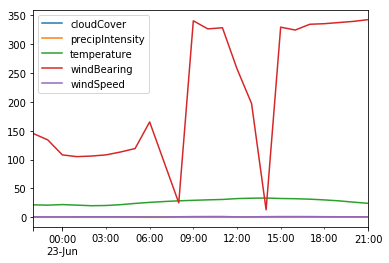

In [60]:
df.plot()

In [69]:
t

'2017-06-23T00:00:00'